In [1]:
#import libraries
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
from google.colab import files
uploaded = files.upload()


Saving dataset_diabetes_final.csv to dataset_diabetes_final.csv


In [3]:
dataset = pd.read_csv('dataset_diabetes_final.csv')

In [4]:
#partial view of dataset from top
dataset.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [5]:
#partial view of dataset from bottom
dataset.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
5494,Male,70.0,1,0,not current,34.70,6.5,155,1
5495,Female,67.0,0,0,No Info,32.77,5.8,130,0
5496,Female,39.0,0,0,never,25.67,4.5,85,0
5497,Male,65.0,1,0,No Info,27.32,4.8,160,0
5498,Male,73.0,0,0,No Info,27.32,5.8,140,0


In [6]:
#basic dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5499 entries, 0 to 5498
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               5499 non-null   object 
 1   age                  5499 non-null   float64
 2   hypertension         5499 non-null   int64  
 3   heart_disease        5499 non-null   int64  
 4   smoking_history      5499 non-null   object 
 5   bmi                  5499 non-null   float64
 6   HbA1c_level          5499 non-null   float64
 7   blood_glucose_level  5499 non-null   int64  
 8   diabetes             5499 non-null   int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 386.8+ KB


In [7]:
#dimention of the dataset
dataset.shape

(5499, 9)

In [8]:
#basic statistics symmary
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5499.0,42.068056,22.559689,0.08,24.00,43.00,60.00,80.00
hypertension,5499.0,0.075832,0.264753,0.00,0.00,0.00,0.00,1.00
heart_disease,5499.0,0.037825,0.190790,0.00,0.00,0.00,0.00,1.00
bmi,5499.0,27.366392,6.735465,10.01,23.71,27.32,29.55,88.72
HbA1c_level,5499.0,5.542899,1.083929,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,5499.0,138.228769,41.091125,80.00,100.00,140.00,159.00,300.00
diabetes,5499.0,0.087470,0.282549,0.00,0.00,0.00,0.00,1.00


                          age  hypertension  heart_disease       bmi  \
age                  1.000000      0.240593       0.238918  0.311713   
hypertension         0.240593      1.000000       0.112442  0.140142   
heart_disease        0.238918      0.112442       1.000000  0.056669   
bmi                  0.311713      0.140142       0.056669  1.000000   
HbA1c_level          0.117658      0.069472       0.087051  0.083402   
blood_glucose_level  0.113592      0.084507       0.085757  0.080605   
diabetes             0.253821      0.193358       0.164672  0.220579   

                     HbA1c_level  blood_glucose_level  diabetes  
age                     0.117658             0.113592  0.253821  
hypertension            0.069472             0.084507  0.193358  
heart_disease           0.087051             0.085757  0.164672  
bmi                     0.083402             0.080605  0.220579  
HbA1c_level             1.000000             0.153975  0.426091  
blood_glucose_level     0.1

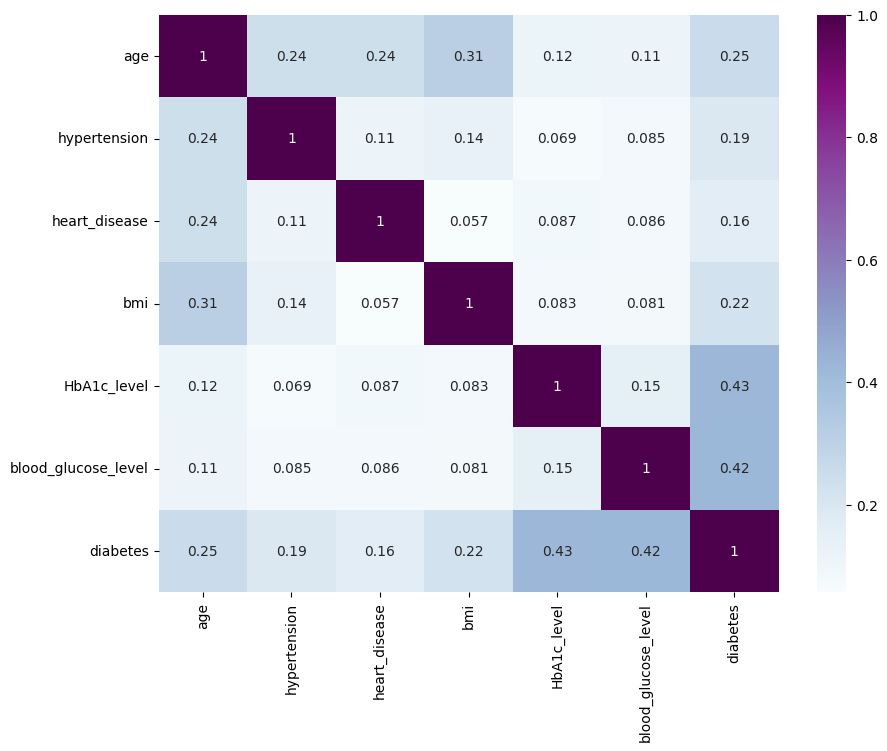

In [9]:
#finding correlation between the features
import seaborn as sns
import matplotlib.pyplot as plt
corr_var=dataset.corr(numeric_only=True) # added numeric_only=True
print(corr_var)
plt.figure(figsize=(10,7.5)) #matplotlib.pyplot is now imported as plt
sns.heatmap(corr_var, annot=True, cmap='BuPu') #seaborn is now imported as sns
plt.show()

In [10]:
#as there is no importance in cust id, row no and sur name for modelling we are not included here in independent feature
X = dataset.iloc[:, 3:-1].values
#target value
y = dataset.iloc[:, -1].values

In [11]:
#independent features
print(X)

[[1 'never' 25.19 6.6 140]
 [0 'No Info' 27.32 6.6 80]
 [0 'never' 27.32 5.7 158]
 ...
 [0 'never' 25.67 4.5 85]
 [0 'No Info' 27.32 4.8 160]
 [0 'No Info' 27.32 5.8 140]]


In [12]:
#dependent features
print(y)

[0 0 0 ... 0 0 0]


In [13]:
#as we have two columns as categorical terms we go for encoding we need to convert to numericals
#Categorical encoding

#gender will have some correlation with other feature so we go for label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#gender column in index 2
X[:, 2] = le.fit_transform(X[:, 2])

In [14]:
print(X)

[[1 'never' 809 6.6 140]
 [0 'No Info' 988 6.6 80]
 [0 'never' 988 5.7 158]
 ...
 [0 'never' 851 4.5 85]
 [0 'No Info' 988 4.8 160]
 [0 'No Info' 988 5.8 140]]


In [15]:
#country name wont be that much correlation added it has more than 2 names so go for one hot encoding
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
#country name is present in 1st index value
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [16]:
print(X)

[[0.0 0.0 0.0 ... 809 6.6 140]
 [1.0 0.0 0.0 ... 988 6.6 80]
 [0.0 0.0 0.0 ... 988 5.7 158]
 ...
 [0.0 0.0 0.0 ... 851 4.5 85]
 [1.0 0.0 0.0 ... 988 4.8 160]
 [1.0 0.0 0.0 ... 988 5.8 140]]


In [17]:
#training and testing split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [18]:
#feature scaling is an important and mandatory for ann process before modelling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
#ANN - initializing
ann = tf.keras.models.Sequential()

In [20]:
#input layer
# 6 features
ann.add(tf.keras.layers.Dense(units=9, activation='relu'))

In [38]:
#hidden layer
from tensorflow.keras.layers import Dropout
ann.add(tf.keras.layers.Dense(units=9, activation='relu'))
ann.add(Dropout(0.3))

In [39]:
#output layer
#as target value is binary - AF
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [40]:
#compiling
#loss - target is binary
#ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
from tensorflow.keras.optimizers import Nadam
ann.compile(optimizer=Nadam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])


In [41]:
#training set
ann.fit(X_train, y_train, batch_size = 32, epochs = 50)

Epoch 1/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9007 - loss: 0.6752
Epoch 2/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9202 - loss: 0.5717
Epoch 3/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9108 - loss: 0.4488
Epoch 4/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9194 - loss: 0.3365
Epoch 5/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9242 - loss: 0.2711
Epoch 6/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9404 - loss: 0.2212
Epoch 7/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9442 - loss: 0.1949
Epoch 8/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9596 - loss: 0.1547
Epoch 9/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9617 - loss: 0.1524
Epoch 10/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9670 - loss: 0.1356
Epoch 11/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9636 - loss: 0.1355
Epoch 12/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

In [42]:
#test result - prediction
y_pred = ann.predict(X_test)
#insted of values we ll get 0 or 1
y_pred = (y_pred > 0.5)
#actual vs prediicted outputs
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [43]:
#training set
ann.fit(X_train, y_train, batch_size = 32, epochs = 50)

Epoch 1/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9717 - loss: 0.1071
Epoch 2/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9688 - loss: 0.1050
Epoch 3/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9657 - loss: 0.1167
Epoch 4/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9658 - loss: 0.1162
Epoch 5/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9671 - loss: 0.1089
Epoch 6/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9704 - loss: 0.1007
Epoch 7/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9622 - loss: 0.1177
Epoch 8/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9691 - loss: 0.1082
Epoch 9/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9634 - loss: 0.1153
Epoch 10/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9673 - loss: 0.1016
Epoch 11/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9692 - loss: 0.1022
Epoch 12/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

In [44]:
#accuracy and confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1500   15]
 [  47   88]]


0.9624242424242424

In [36]:
# Input data with 10 features
input_data = [[
    1,  # gender_Female (1 if Female, else 0)
    0,  # gender_Male (1 if Male, else 0)
    54, # age
    0,  # hypertension
    0,  # heart_disease
    27.3, # bmi
    6.6,  # HbA1c_level
    80,   # blood_glucose_level
    0,  # smoking_history_no_info (1 if No Info, else 0)
    1   # smoking_history_never (1 if Never smoked, else 0)
]]

# Apply scaling
input_scaled = sc.transform(input_data)

# Make prediction
prediction = ann.predict(input_scaled)

# Display prediction
print(prediction)

# Display whether prediction > 0.5
print(prediction > 0.5)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[[0.]]
[[False]]
